## Predicting US Covid Cases based on historical CDC reported flu data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

### getting historical flu data

In [2]:
flu_dir = "../../cdc-fludata/us_national/"

In [3]:
flu_dictionary = {}

for year in range(1997, 2019):
    filepath = "usflu_"
    year_string = str(year) + "-" + str(year + 1)
    filepath = flu_dir + filepath + year_string + ".csv"
    temp_df = pd.read_csv(filepath)
    flu_dictionary[year] = temp_df

In [4]:
flu_dictionary[2003]

,YEAR,WEEK,TOTAL SPECIMENS,A (H1),A (Unable to Subtype),A (H3),A (2009 H1N1),A (Subtyping not Performed),B,H3N2v,PERCENT POSITIVE
0,2003,40,1430,0,0,2,0,19,1,0,1.538460
1,2003,41,1682,0,0,3,0,74,0,0,4.577880
2,2003,42,2176,0,0,17,0,235,1,0,11.626800
3,2003,43,2568,0,0,56,0,398,4,0,17.834900
4,2003,44,2753,0,0,100,0,435,0,0,19.433300
5,2003,45,3553,1,0,273,0,585,3,0,24.261200
6,2003,46,4595,0,0,381,0,908,2,0,28.095800
7,2003,47,5942,0,0,585,0,1375,8,0,33.120200
8,2003,48,6479,0,0,489,0,1752,10,0,34.743000
9,2003,49,9598,0,0,977,0,2260,32,0,34.059200


### combining flu data into one chronological series of total cases

In [5]:
# getting total cases and putting them in a series by week
flu_series_dict = {} 

for year in flu_dictionary:
    temp_df = flu_dictionary[year]
    temp_df = temp_df.set_index("WEEK")
    abridged_df = temp_df.iloc[:, 2:]
    
    try:
        abridged_df = abridged_df.drop(columns="PERCENT POSITIVE")
    except:
        pass
    
    total_cases_series = abridged_df.sum(axis=1)
    flu_series_dict[year] = total_cases_series
    

In [6]:
all_cases_series = pd.Series(dtype="int64")

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    all_cases_series = all_cases_series.append(temp_series, ignore_index=True)

In [7]:
all_cases_series

0         0
1        11
2        17
3         7
4        10
       ... 
1143     87
1144    110
1145    143
1146    147
1147    152
Length: 1148, dtype: int64

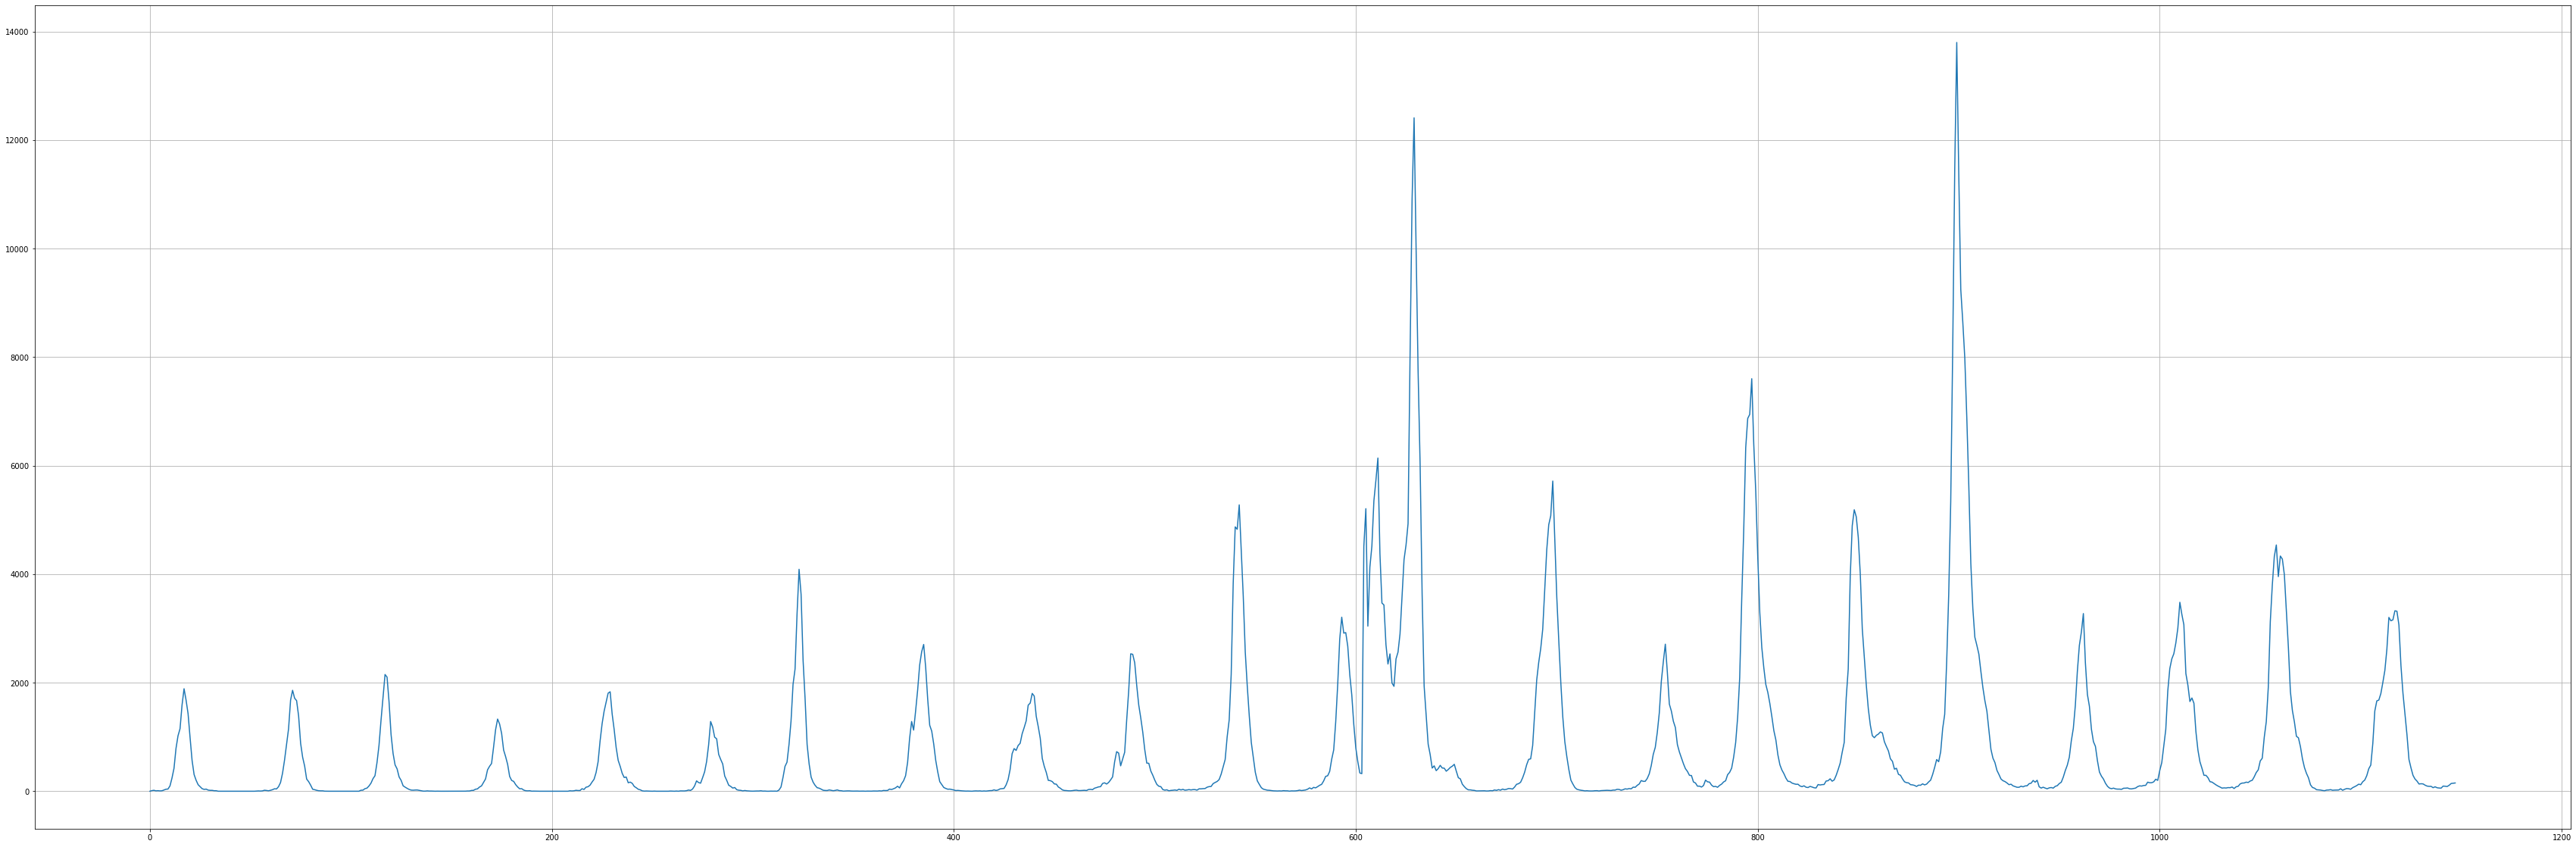

In [8]:
all_cases_series.plot(grid=True, figsize=(60,20))

## Now, making a normalized series between 0, 1

In [9]:
norm_flu_series_dict = {}

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    temp_list = preprocessing.minmax_scale(temp_series)
    temp_series = pd.Series(temp_list)
    norm_flu_series_dict[year] = temp_series

In [10]:
all_cases_norm_series = pd.Series(dtype="int64")

for year in norm_flu_series_dict:
    temp_series = norm_flu_series_dict[year]
    all_cases_norm_series = all_cases_norm_series.append(temp_series, ignore_index=True)

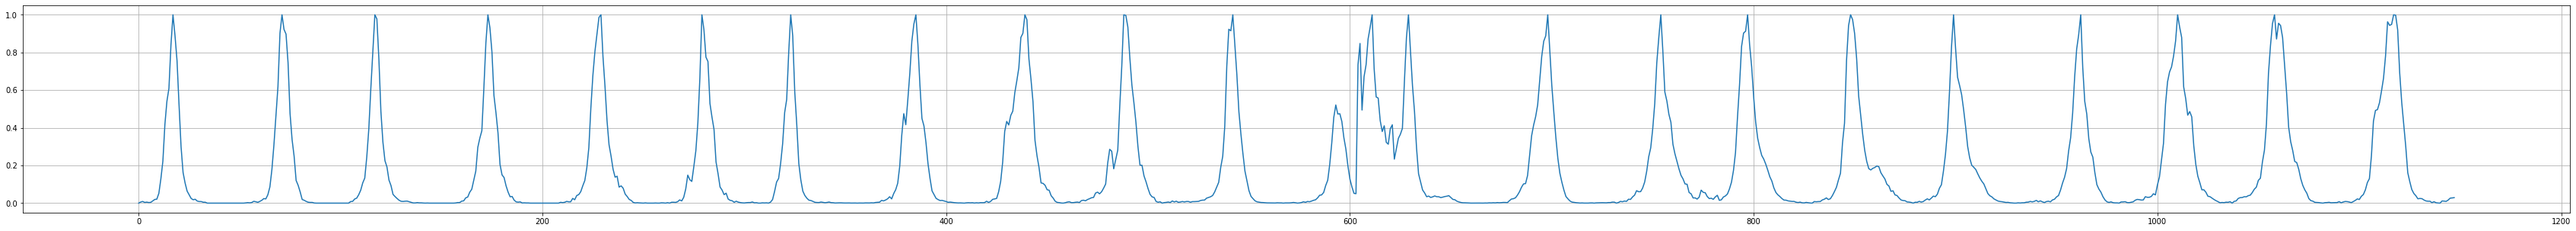

In [11]:
all_cases_norm_series.plot(grid=True, figsize=(60,5))

## Getting US COVID-19 Case Data

In [12]:
datapath = "../../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "World Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [13]:
covid_df = pd.read_csv(datapath)

In [14]:
covid_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,639,659,661,662,671,683,688,693,698,698
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,632,705,728,844,885,902,909,919,922,941
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,163,176,176,176,197,197,210,210,247,247
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4902,4971,5035,5097,5160,5221,5279,5338,5399,5457


In [17]:
us_data = covid_df.loc[covid_df["Country/Region"] == "US"]

In [21]:
us_cases = us_data.iloc[:,4:]

In [22]:
us_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
225,1,1,2,2,5,5,5,5,5,7,...,2048986,2074526,2094058,2114026,2137731,2163290,2191052,2222579,2255119,2279879


In [25]:
us_cases = us_cases.squeeze()

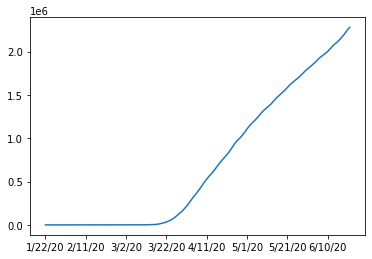

In [27]:
us_cases.plot()

### Converting cumulative series to non-cumulative series